# WEEK 25: Regression Analysis - Part1

Regression analysis is a statistical method used to analyze and model the relationship between one or more independent variables and a dependent variable. 


It aims to predict or explain the value of the dependent variable based on the values of the independent variables. 



### Irreducible error : 

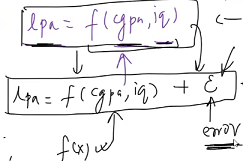

Error are the mathematical variations which cannot be expressed in terms of numbers. __We cannot reduce this error__

### reducible error is $(y - \hat y)$ which can be reduced by us : 

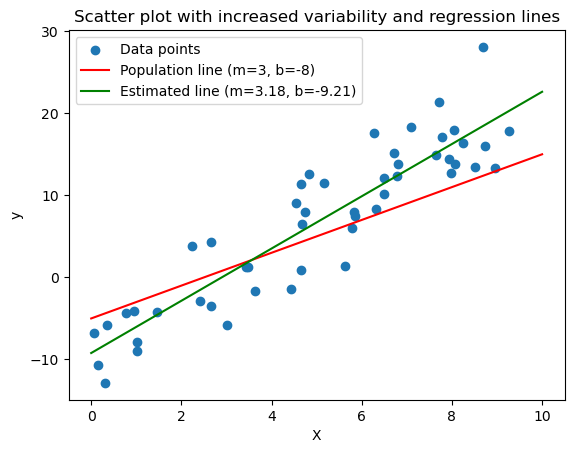

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Generate the sample data
x = 10 * np.random.rand(50)
y = 3 * x - 8 + np.random.randn(50) * 4 # randomness added to y

# Fit a linear regression model
x = x.reshape(-1, 1)
model = LinearRegression()
model.fit(x, y)

# Calculate the predicted values
y_pred = model.predict(x)

# Plot the scatter plot and regression lines
plt.scatter(x, y, label="Data points")
plt.xlabel("X")
plt.ylabel("y")
plt.title("Scatter plot with increased variability and regression lines")

# Plot the actual population line
x_line = np.linspace(0, 10, 100)
y_actual = 2 * x_line - 5
plt.plot(x_line, y_actual, 'r', label="Population line (m=3, b=-8)")

# Plot the estimated regression line
y_estimated = model.coef_[0] * x_line + model.intercept_
plt.plot(x_line, y_estimated, 'g', label=f"Estimated line (m={model.coef_[0]:.2f}, b={model.intercept_:.2f})")

# Add legend and show the plot
plt.legend()
plt.show()


### Inference vs prediction : 

Where we need inference (reason why it happend) we need regression analysis

### Degree of Freedom : 

- In linear regression, the total degrees of freedom (df_total) represent the total number of data
points minus 1.


- It represents the overall variability in the dataset that can be attributed to
both the model(TSS) and the residuals(RSS).
For a linear regression with n data points (observations), the total degrees of freedom can be
calculated as: 

$$df_{total} = n - 1$$

where 'n' is the number of data points (observations) in the dataset
 
 
The total degrees of freedom in linear regression is divided into two components:

1. __Degrees of freedom for the model (df_model) :__ This is equal to the number of
independent variables (number of input columns) in the model (k).


2. __Degrees of freedom for the residuals (df_residuals) :__ The degrees of freedom for the residuals indicate the number of independent pieces of information that are available for estimating the variability in the residuals (errors) after
fitting the regression model.
This is equal to the number of data points (n) minus the number of estimated parameters,
including the intercept (k+1).



The sum of the degrees of freedom for the model and the degrees of freedom for the
residuals is equal to the total degrees of freedom:
$$df_{total}= df_{model} + df_{residuals}$$

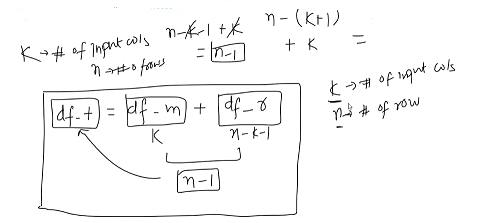

#### for 100 sample points we only want 99 points of them for population estimation. We wouldn't be needing all 100 points.

#### 100th point can be caluclated using mean and rest 99 points

## Statsmodel

In [4]:
import pandas as pd
import statsmodels.api as sm

# Load the dataset
url = "https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv"
data = pd.read_csv(url, index_col=0)

#### TV + radio : 

In [6]:
# Define the independent variables (add a constant for the intercept)
X = data[['TV', 'Radio']]
X = sm.add_constant(X)

# Define the dependent variable
y = data['Sales']

# Fit the model using the independent and dependent variables
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     859.6
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           4.83e-98
Time:                        06:06:30   Log-Likelihood:                -386.20
No. Observations:                 200   AIC:                             778.4
Df Residuals:                     197   BIC:                             788.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9211      0.294      9.919      0.0

#### TV + radio + Newspaper

In [7]:
# Define the independent variables (add a constant for the intercept)
X = data[['TV', 'Radio', 'Newspaper']]
X = sm.add_constant(X)

# Define the dependent variable
y = data['Sales']

# Fit the model using the independent and dependent variables
model = sm.OLS(y, X).fit()

# Print the summary of the model
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 02 Oct 2023   Prob (F-statistic):           1.58e-96
Time:                        06:06:34   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

Meaning of each values in the table : https://jyotiyadav99111.medium.com/statistics-how-should-i-interpret-results-of-ols-3bde1ebeec01

#### Durbin-watson:

Another assumption of OLS is of **Homoscedasticity.** This implies that the variance of errors is constant. **A value between 1 to 2 is preferred.**

#### P-Value is significance level

P-value gives how many experiments will fail out of 100 experiments

> A p-value < 0.05 means that the variable is significant.

#### For std err
>It is the accuracy of predicition for each variable. Lower the std err better the estimate.
<br></br>



#### OLS - Ordinary least Square

It is the most common method to estimate the linear regression equation.

Least Squares stands for the minimum squares error, ie. SSE.

Lower error $\rightrightarrows$ Better explanatory Power.

Lowest error $\rightrightarrows$ Best explanatory Power.

So this method aims to find the line which minimizes the sum of the squared errors.

Graphically the regression line is the one closet to all points simultaneously with $b_0$ as intercept and $b_1$ as slope.

# WEEK 25: Regression Analysis - Part2

## F-statistic & Prob(F-statistic)

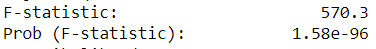


The __F-test for overall significance__ is a statistical test used to determine whether a linear
regression model is statistically significant, meaning it provides a better fit to the data than
just using the mean of the dependent variable.

___F-test for overall significance checks whether there is linear relationship between x (input columns) and y (output column). it doesnot tells about relationship with each column and out column. it is for overall.___ 

- if p-value is less than 0.05 then we can reject the null hypothesis that there is no relation. We can confirm there is relation between x and y



- if  p-value is greater than 0.05 we will fail to reject the null hypothesis that there is no relation. 

Here are the steps involved in conducting an F-test for overall significance:

1. State the null and alternative hypotheses:
    - ___Null hypothesis (H0) :___ All regression coefficients (except the intercept) are equal to zero $(\beta_1 = \beta_2 = ...
    = \beta_k = 0)$, meaning that none of the independent variables contribute significantly to the explanation of the dependent variable's variation. 
    - ___Alternative hypothesis (H1) :___ At least one regression coefficient is not equal to zero, indicating that at least one independent variable contributes significantly to the explanation of the dependent variable's variation.
    
    
2. Fit the linear regression model to the data, estimating the regression coefficients
(intercept and slopes).



3. Calculate the __Sum of Squares (SS)__ values:
    - ___Total Sum of Squares (TSS) :___ The sum of squared differences between each observed
value of the dependent variable and its mean.
    - ___Regression Sum of Squares (ESS) :___ The sum of squared differences between the
predicted values of the dependent variable and its mean.
    - ___Residual Sum of Squares (RSS) :___ The sum of squared differences between the
observed values and the predicted values of the dependent variable.



4. Compute the __Mean Squares (MS)__ values:
    - ___Mean Square Regression (MSR) :___ ESS divided by the degrees of freedom for the model
(df_model), which is the number of independent variables (k). This could also be
called as Average Explained Variance per independent feature.
    - ___Mean Square Error (MSE) :___ RSS divided by the degrees of freedom for the residuals
(df_residuals), which is the number of data points (n) minus the number of estimated
parameters, including the intercept (k+1). This could also be called as average
unexplained variance per degree of freedom.



5. Calculate the F-statistic: 
    - ___F-statistic = MSR / MSE___

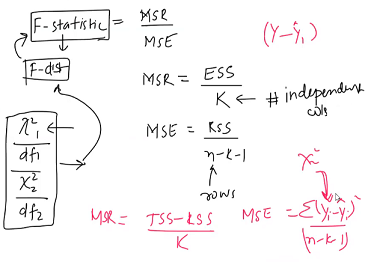

6. Determine the p-value:
    - Compute the p-value associated with the calculated F-statistic using the F-distribution or a statistical software package.
    
 

7. Compare the calculated F-statistic to the p-value to the chosen significance level $(\alpha)$:
    - If the p-value < $\alpha$, reject the null hypothesis. This indicates that at least one
independent variable contributes significantly to the prediction of the dependent
variable, and the overall regression model is statistically significant. 
    - If the p-value $\geq \alpha$, fail to reject the null hypothesis. This suggests that none of the
independent variables in the model contribute significantly to the prediction of the
dependent variable, and the overall regression model is not statistically significant.

### NOTE : using R squared we can say how strong or weak the relationship is between x and y

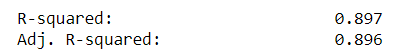

## T-statistics

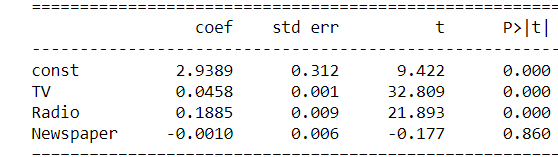

Performing a t-test for a simple linear regression, including the intercept
term and using the p-value approach, involves the following steps:

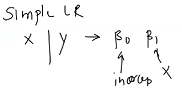

1. State the null and alternative hypotheses for the slope and intercept
coefficients:
    - __For the slope coefficient (β1) :__
        - Null hypothesis (H0): β1 = 0 (no relationship between the
predictor variable (X) and the response variable (y))
        - Alternative hypothesis (H1): β1 ≠ 0 (a relationship exists
between the predictor variable and the response variable)<br></br>
    - __For the intercept coefficient (β0) :__
        - Null hypothesis (H0): β0 = 0 (the regression line passes through
the origin)
        - Alternative hypothesis (H1): β0 ≠ 0 (the regression line does not
pass through the origin) 



2. Estimate the slope and intercept coefficients (b0 and b1): 
    - Using the sample data, calculate the slope (b1) and intercept (b0) coefficients for the regression model.


3. Calculate the standard errors for the slope and intercept coefficients
(SE(b0) and SE(b1)): 
    - Compute the standard errors of the slope and intercept coefficients using the following formulas:

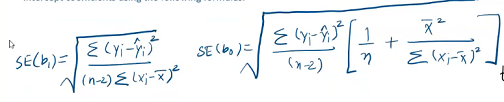

- $b_1$ is the estimation of $\beta_1$ and $b_0$ is the estimation of $\beta_0$

4. Compute the t-statistics for the slope and intercept coefficients:
    - Calculate the t-statistics for the slope and intercept coefficients using the following formulas:

$$\text{t-statistics for slope}\;\beta_0= \frac{b_0-0}{SE(b_0)}$$


$$\text{t-statistics for slope}\;\beta_1= \frac{b_1-0}{SE(b_1)}$$


where 
- $b_1$ is the estimation of $\beta_1$ and $b_0$ is the estimation of $\beta_0$
- SE is Standard Error.
- 0 is the hypothised value

5. Calculate the p-values for the slope and intercept coefficients: 
    - Using the t-statistics and the degrees of freedom, look up the corresponding p-values from the t-distribution table or use a statistical calculator.
link - https://www.socscistatistics.com/pvalues/tdistribution.aspx


6. Compare the p-values to the chosen significance level (α): A common
choice for α is 0.05, which corresponds to a 95% confidence level.
Compare the calculated p-values to α:
    - If the p-value is less than or equal to α, reject the null
hypothesis.
    - If the p-value is greater than α, fail to reject the null hypothesis. 

### Confidence Intervals for Coefficients : 

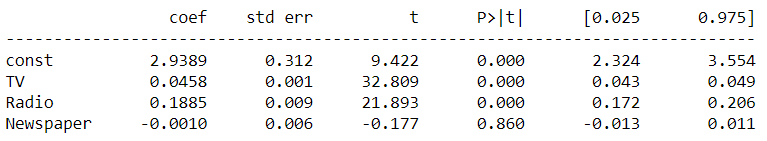

1. __Estimate the slope and intercept coefficients (b0 and b1) :__ Using the
sample data, calculate the slope (b1) and intercept (b0) coefficients for
the regression model.


2. __Calculate the standard errors for the slope and intercept coefficients
(SE(b0) and SE(b1)) :__

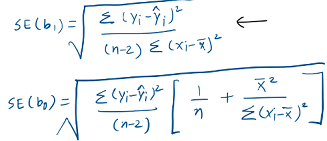

3. __Determine the degrees of freedom :__ In a simple linear regression, the
degrees of freedom (df) is equal to the number of observations (n)
minus the number of estimated parameters (2: the intercept and the
slope coefficient).

$$df = n-1$$


4. __Find the critical t-value :__ Look up the critical t-value from the t-
distribution table or use a statistical calculator based on the chosen confidence level (e.g., 95%) and the degrees of freedom calculated in step 3.


5. __Calculate the confidence intervals for the slope and intercept
coefficients :__ Compute the confidence intervals for the slope (b1) and
intercept (b0) coefficients using the following formulas:

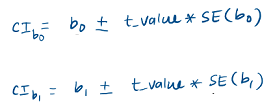

These confidence intervals represent the range within which the true
population regression coefficients are likely to fall with a specified
level of confidence (e.g., 95%)

---

# WEEK 25 : Assumptions of Linear regression:

Linear regression relies on several assumptions to ensure the validity and reliability
of the estimates and inferences. The key assumptions of linear regression are:

### 1. Linearity
### 2. Normality of Residuals
### 3. Homoscedasticity
### 4. No or little Multicollinearity
### 5. No Autocorrelation

## 1. Linearity

### The Assumption:

There is a linear relationship between the independent variables and the dependent variable.
The model assumes that changes in the independent variables lead to proportional changes in
the dependent variable.

### What happens when this assumption is violated?

1. __Bias in parameter estimates :__ When the true relationship is not linear, the estimated
regression coefficients can be biased, leading to incorrect inferences about the
relationship between the independent and dependent variables.


2. __Reduced predictive accuracy :__ A mis specified linear model may not accurately capture the
underlying relationship, which can result in poor predictive performance. The model
might underfit the data, missing important patterns and trends.


3. __Invalid hypothesis tests and confidence intervals :__ The violation of the linearity assumption
can affect the validity of hypothesis tests and confidence intervals, leading to incorrect
inferences about the significance of the independent variables and the effect sizes.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)

df = pd.DataFrame()

df['x1'] = x.reshape(100)
df['x2'] = y.reshape(100)
df['y'] = z.reshape(100)

df

,x1,x2,y
0,-1.839785,-0.523013,2.835778
1,-0.051502,-1.666386,5.027002
2,-2.664539,-2.368869,13.945615
3,2.747038,2.543915,18.180188
4,0.010346,3.555400,15.602916
...,...,...,...
95,1.019866,-2.698299,9.569170
96,0.697058,1.475970,4.473621
97,-2.117785,3.686063,19.540737
98,3.092719,3.289382,25.329076


### How to check this assumption

1. __Scatter plots__


2. __Residual plots__


3. __Polynomial terms__

1. __Scatter plots :__ Create scatter plots of the dependent variable against each independent
variable. If the relationship appears to be linear, the linearity assumption is likely satisfied.
Nonlinear patterns or other trends may indicate that the assumption is violated.

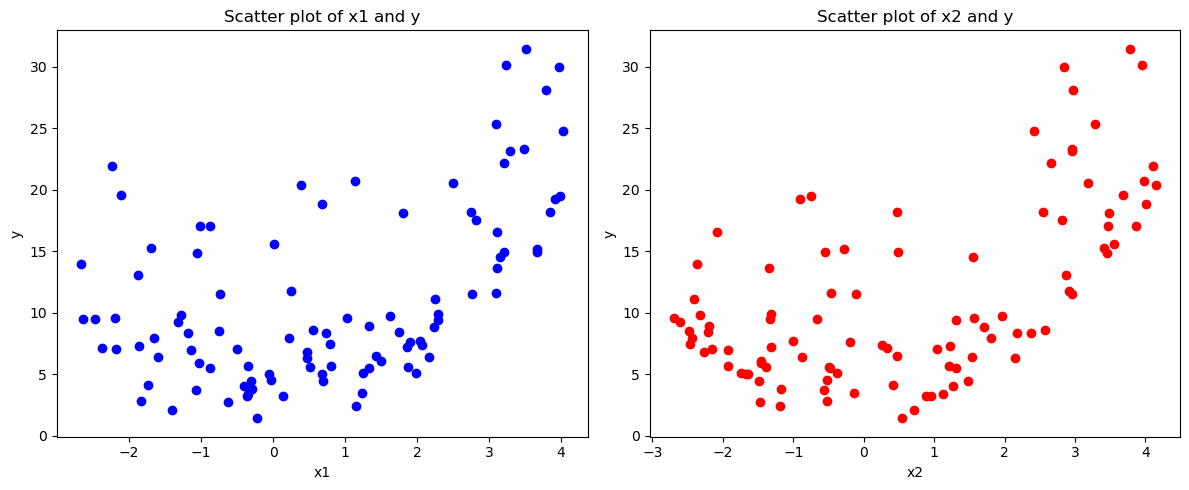

In [4]:
# Create a new figure and define subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot x1 and y
ax1.scatter(df['x1'], df['y'], color='blue')
ax1.set_title('Scatter plot of x1 and y')
ax1.set_xlabel('x1')
ax1.set_ylabel('y')

# Plot x2 and y
ax2.scatter(df['x2'], df['y'], color='red')
ax2.set_title('Scatter plot of x2 and y')
ax2.set_xlabel('x2')
ax2.set_ylabel('y')

plt.tight_layout()
plt.show()

2. __Residual plots :__ Plot the residuals (the differences between the observed and predicted
values) against the predicted values or against each independent variable. __If the linearity
assumption holds, the residuals should be randomly scattered around zero, with no
discernible pattern.__ Any trends, curvature, or heteroscedasticity in the residual plots
suggest that the linearity assumption may be violated.

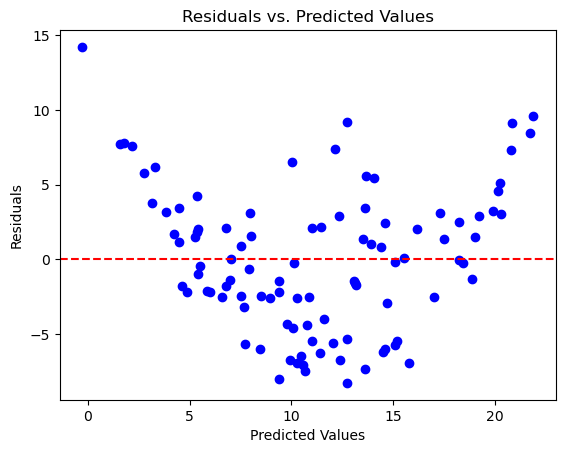

In [5]:
# Fit a linear regression model
X = df[['x1', 'x2']]
y = df['y']

model = LinearRegression()
model.fit(X, y)

# Calculate predicted values and residuals
y_pred = model.predict(X)
residuals = y - y_pred

# Plot residuals against predicted values
plt.scatter(y_pred, residuals, color='blue')
plt.axhline(y=0, color='red', linestyle='--')
plt.title('Residuals vs. Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

plt.show()

##### conclusion : the residual points are not random. it is forming parabola. So non-linearity exists.

3. __Polynomial terms :__ Add polynomial terms to your model and compare the model fit with
the original linear model. If the new model with additional terms significantly improves
the fit, it may suggest that the linearity assumption is violated.

##### adding polynomial terms : 

In [6]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit a linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_y_pred = linear_model.predict(X_test)

# Calculate metrics for linear model
linear_r2 = r2_score(y_test, linear_y_pred)
linear_mse = mean_squared_error(y_test, linear_y_pred)

# Fit a polynomial model
poly_features = PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
poly_y_pred = poly_model.predict(X_test_poly)

# Calculate metrics for polynomial model
poly_r2 = r2_score(y_test, poly_y_pred)
poly_mse = mean_squared_error(y_test, poly_y_pred)

# Compare model performance
print("Linear model")
print(f"R-squared: {linear_r2:.4f}")
print(f"Mean Squared Error: {linear_mse:.4f}")

print("\nPolynomial model")
print(f"R-squared: {poly_r2:.4f}")
print(f"Mean Squared Error: {poly_mse:.4f}")


Linear model
R-squared: 0.5448
Mean Squared Error: 24.5939

Polynomial model
R-squared: 0.9756
Mean Squared Error: 1.3158


##### conclusion: as r2 score decreased after adding polynomial (degrre 2) so there is non-linearity

### What to do when the assumption fails?

1. __Transformations__


2. __Polynomial regression__


3. __Piecewise regression__


4. __Non-parametric or semi-parametric methods__

1. __Transformations :__ Apply transformations to the dependent and/or independent variables
to make their relationship more linear. Common transformations include logarithmic,
square root, and inverse transformations.

eg : __apply yeo-johnson transformation__

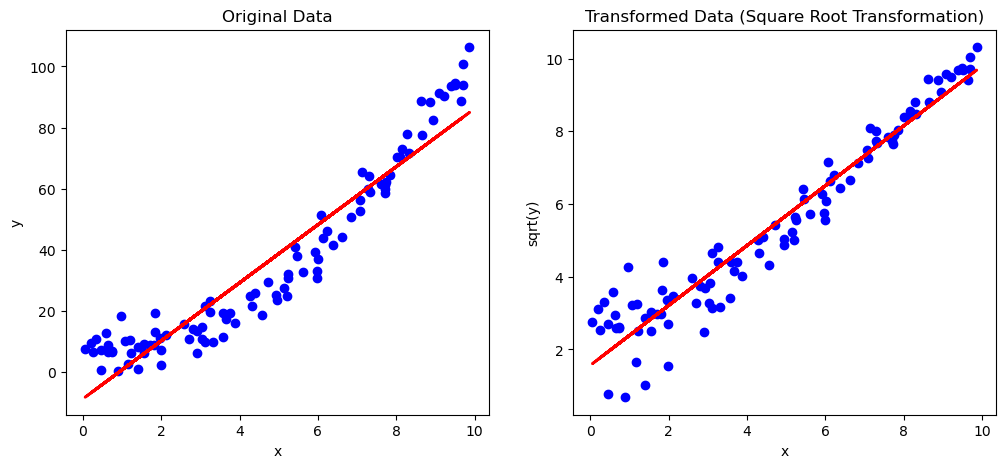

Original linear model
R-squared: 0.9008

Transformed linear model
R-squared: 0.9291


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Generate a non-linear dataset with a quadratic relationship
np.random.seed(42)
x = 10 * np.random.rand(100, 1)
y = x**2 + 5 + np.random.normal(0, 5, (100, 1))
y = np.abs(y)  # Ensure y is non-negative


# Apply square root transformation to y
y_sqrt = np.sqrt(y)

# Fit linear regression models for the original and transformed data
linear_model_original = LinearRegression()
linear_model_original.fit(x, y)
linear_model_transformed = LinearRegression()
linear_model_transformed.fit(x, y_sqrt) # using x and sqrt of y

# Predictions
y_pred_original = linear_model_original.predict(x)
y_pred_transformed = linear_model_transformed.predict(x)

# Visualize the relationship between x and y before and after transformation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Before transformation
ax1.scatter(x, y, color='blue')
ax1.plot(x, y_pred_original, color='red', linewidth=2)
ax1.set_title('Original Data')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# After transformation
ax2.scatter(x, y_sqrt, color='blue')
ax2.plot(x, y_pred_transformed, color='red', linewidth=2)
ax2.set_title('Transformed Data (Square Root Transformation)')
ax2.set_xlabel('x')
ax2.set_ylabel('sqrt(y)')

plt.show()

# Calculate R-squared and Mean Squared Error
r2_original = r2_score(y, y_pred_original)
r2_transformed = r2_score(y_sqrt, y_pred_transformed)

# Compare the performance of the original and transformed models
print("Original linear model")
print(f"R-squared: {r2_original:.4f}")

print("\nTransformed linear model")
print(f"R-squared: {r2_transformed:.4f}")


2. __Polynomial regression :__ Add polynomial terms of the independent variables to the model
to capture non-linear relationships. 

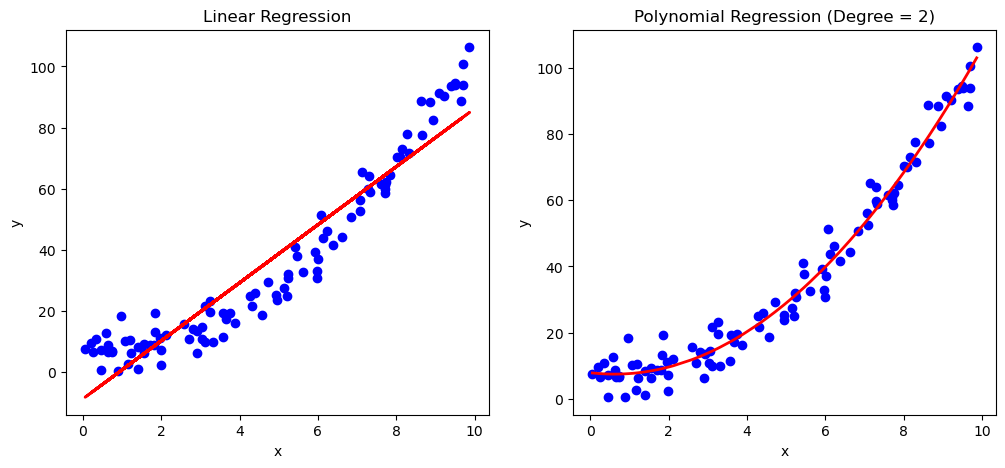

Linear regression
R-squared: 0.9008

Polynomial regression (degree = 2)
R-squared: 0.9782


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

# Generate a non-linear dataset with a quadratic relationship
np.random.seed(42)
x = 10 * np.random.rand(100, 1)
y = x**2 + 5 + np.random.normal(0, 5, (100, 1))
y = np.abs(y)  # Ensure y is non-negative

# Fit linear regression model
linear_model = LinearRegression()
linear_model.fit(x, y)
y_pred_linear = linear_model.predict(x)

# Fit polynomial regression model (degree = 2)
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)
poly_model = LinearRegression()
poly_model.fit(x_poly, y)
y_pred_poly = poly_model.predict(x_poly)

# Visualize the fitted lines for linear and polynomial regression
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Linear regression
ax1.scatter(x, y, color='blue')
ax1.plot(x, y_pred_linear, color='red', linewidth=2)
ax1.set_title('Linear Regression')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Polynomial regression
ax2.scatter(x, y, color='blue')
ax2.plot(sorted(x[:, 0]), y_pred_poly[np.argsort(x[:, 0])], color='red', linewidth=2)
ax2.set_title('Polynomial Regression (Degree = 2)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')

plt.show()

# Calculate R-squared for both models
r2_linear = r2_score(y, y_pred_linear)
r2_poly = r2_score(y, y_pred_poly)

# Compare the performance of the linear and polynomial regression models
print("Linear regression")
print(f"R-squared: {r2_linear:.4f}")

print("\nPolynomial regression (degree = 2)")
print(f"R-squared: {r2_poly:.4f}")


3. __Piecewise regression :__ Divide the range of the independent variable into segments and fit
separate linear models to each segment.


4. __Non-parametric or semi-parametric methods :__ Consider using non-parametric or semi-
parametric methods that do not rely on the linearity assumption, such as generalized additive models (GAMs), splines, or kernel regression.

## 2. Normality of Residual

### The Assumption

The error terms (residuals) are assumed to follow a normal distribution with a mean of zero
and a constant variance.

$$\epsilon\;\sim\;N\;(0,\sigma^2)$$

### What happens when this assumption is violated?

1. __Inaccurate hypothesis tests :__ The t-tests and F-tests used to assess the significance of the
regression coefficients and the overall model rely on the normality assumption. If the
residuals are not normally distributed, these tests may produce inaccurate results, leading
to incorrect inferences about the significance of the independent variables.


2. __Invalid confidence intervals :__ The confidence intervals for the regression coefficients are
based on the assumption of normally distributed residuals. If the normality assumption is
violated, the confidence intervals may not be accurate, affecting the interpretation of the
effect sizes and the precision of the estimates.


3. __Model performance :__ The violation of the normality assumption may indicate that the
chosen model is not the best fit for the data, potentially leading to reduced predictive
accuracy.

### How to check this assumption

1. __Histogram of residuals__


2. __Q-Q plot__


3. __Plot Residual scatter plot__


4. __Statistical tests__ 

1. __Histogram of residuals :__ Plot a histogram of the residuals to visually assess their
distribution. If the histogram resembles a bell-shaped curve, it suggests that the residuals
are normally distributed. __histogram or kde of $y - \hat y$__

2. __Q-Q plot :__ A Q-Q (quantile-quantile) plot compares the quantiles of the residuals to the
quantiles of a standard normal distribution. If the points in the Q-Q plot fall
approximately along a straight line, it indicates that the residuals are normally distributed.
Deviations from the straight line suggest deviations from normality.

#### normally distributed data :

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Generate a synthetic dataset (normally distributed data)
np.random.seed(42)
x = np.random.rand(100, 1)
y = 3 * x + np.random.normal(0, 0.3, (100, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred


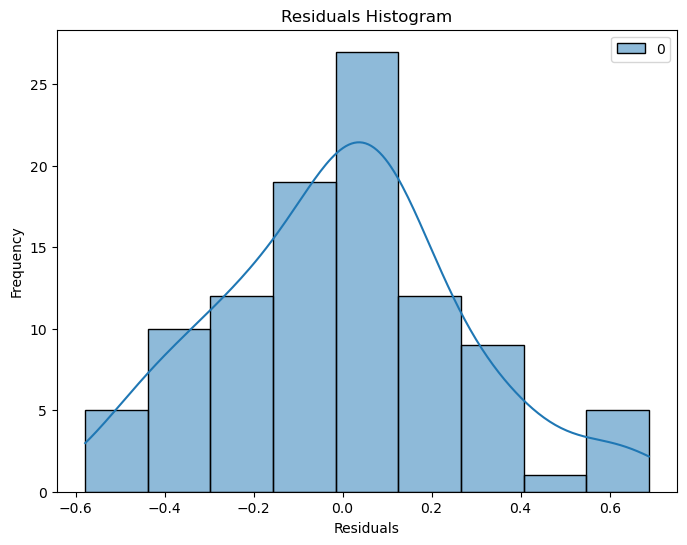

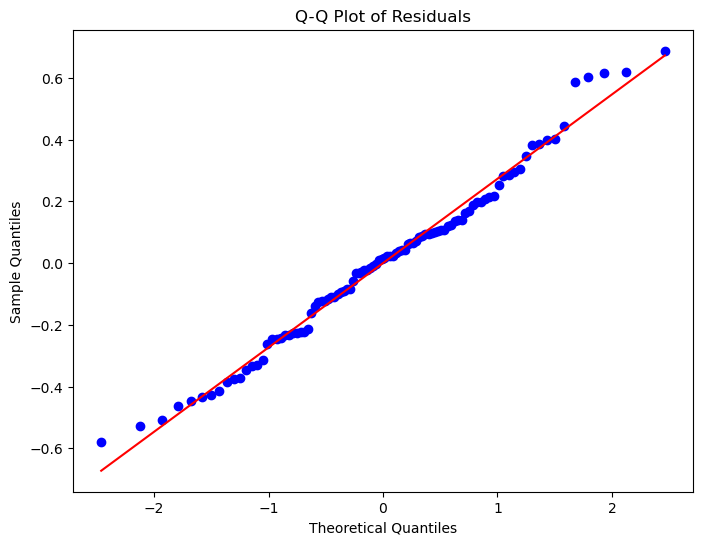

In [14]:
# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
from scipy import stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals.flatten(), plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [11]:
mean_residuals = np.mean(residuals)
print(f"Mean of residuals: {mean_residuals:.4f}")


Mean of residuals: 0.0000


3. __Plot Residual scatter plot__

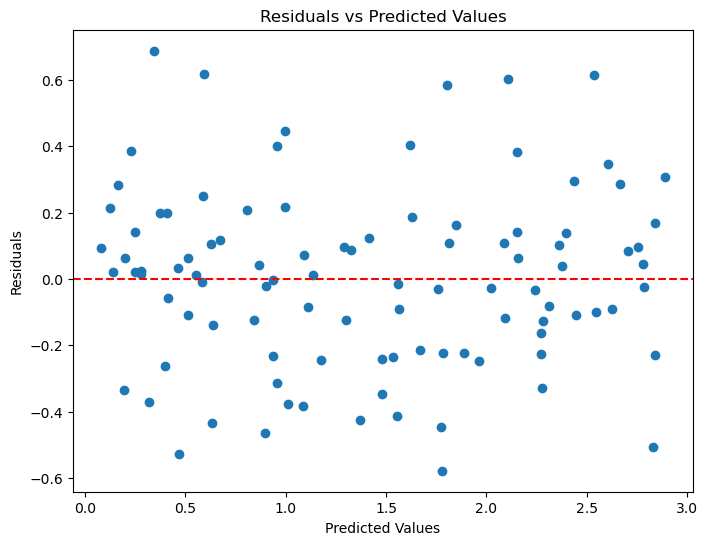

In [12]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


##### conclusion : no pattern in error it is normally distributed

#### for not normally distributed data: (sine data)

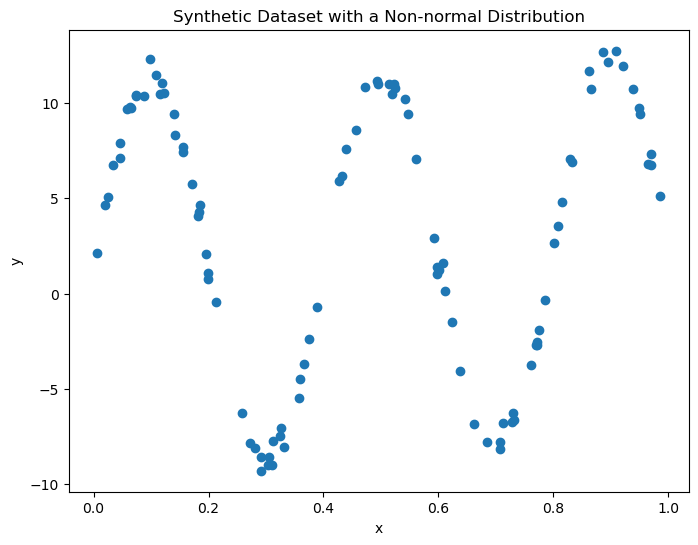

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.random.seed(42)

# Generate a synthetic dataset with a non-normal distribution
x = np.random.rand(100, 1)
y = np.exp(x) + 10*np.sin(5*np.pi*x) + np.random.normal(0, 0.5, (100, 1))

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Synthetic Dataset with a Non-normal Distribution')
plt.show()


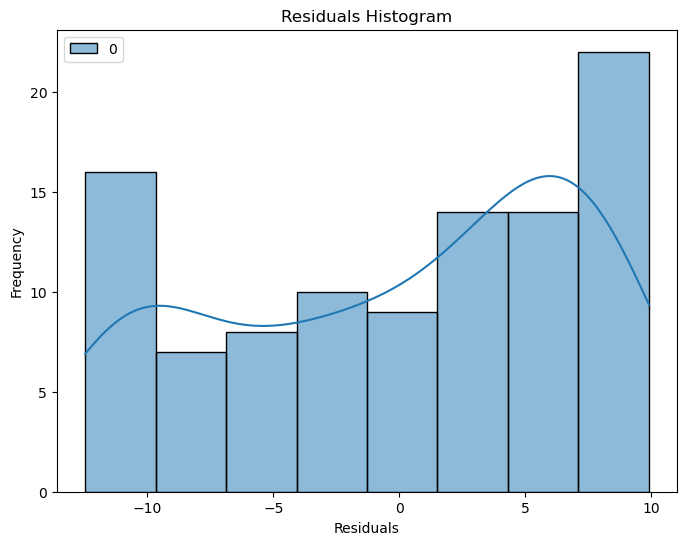

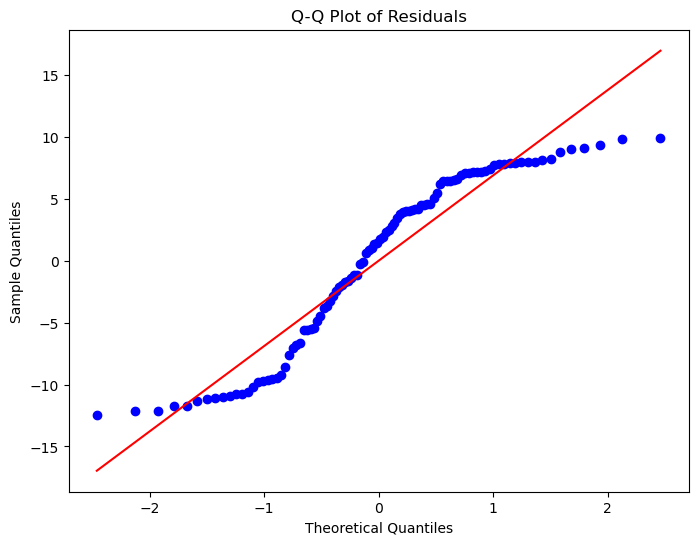

In [16]:
# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred

# Histogram
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Q-Q plot
from scipy import stats

plt.figure(figsize=(8, 6))
stats.probplot(residuals.flatten(), plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()


In [17]:
mean_residuals = np.mean(residuals)
print(f"Mean of residuals: {mean_residuals:.4f}")


Mean of residuals: -0.0000


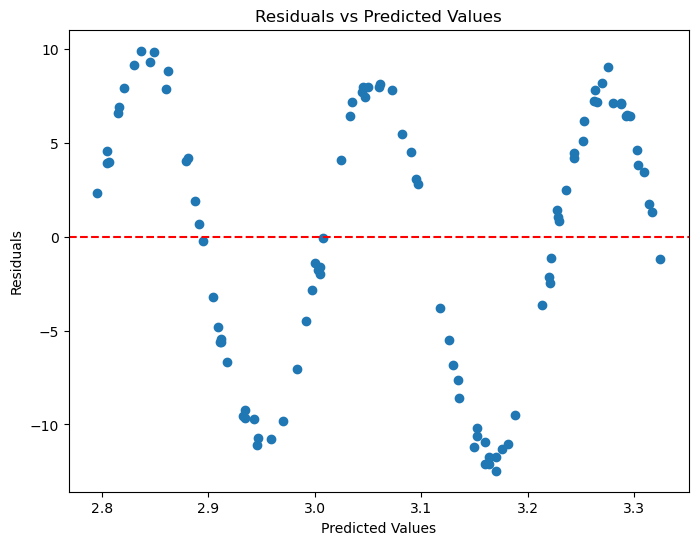

In [18]:
plt.figure(figsize=(8, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()


##### conclusion : pattern is forming so it is not normally distributed

4. __Statistical tests :__ Statistical tests like Omnibus test, Jarque-Bera test or even Shapiro wilk
test can test this assumption.

### What to do when the assumption fails?

1. __Model selection techniques :__ Employ model selection techniques like cross-validation, AIC, or BIC to choose the best model among different candidate models that can handle non-
normal residuals.



2. __Robust regression :__ Use robust regression techniques that are less sensitive to the
distribution of the residuals, such as M-estimation, Least Median of Squares (LMS), or
Least Trimmed Squares (LTS).(Transformation may also help)


3. __Non-parametric or semi-parametric methods :__ Consider using non-parametric or semi-parametric methods that do not rely on the normality assumption, such as generalized additive models (GAMs), splines, or kernel regression.


4. __Use bootstrapping :__ Bootstrap-based inference methods do not rely on the normality of
residuals and can provide more accurate confidence intervals and hypothesis tests.


Remember that the normality of residuals assumption is not always critical for linear
regression, especially when the sample size is large, due to the Central Limit Theorem. 


### NOTE : if n>30 it follow CLT and it is normal distribtion. so Normality of Residual will not give headache.

### Omnibus Test:

The Omnibus test is a statistical test used to check if the residuals from a
linear regression model follow a normal distribution. The test is based on
the skewness and kurtosis of the residuals. Here's a step-by-step guide on
how to conduct the Omnibus test:
Decide the Null and Alternate Hypothesis: The Null hypothesis states
that the residuals are normally distributed and the Alternate
Hypothesis says that the residuals are not normally distributed.


1. __Fit the linear regression model :__ Fit the linear regression model to
your data to obtain the predicted values.


2. __Calculate the residuals :__ Compute the residuals (error terms) by
subtracting the predicted values from the observed values of the
dependent variable.


3. __Calculate the skewness :__ Calculate the skewness of the residuals.
Skewness measures the asymmetry of the distribution. For a normal
distribution, skewness is expected to be close to zero.


4. __Calculate the kurtosis :__ Calculate the kurtosis of the residuals.
Kurtosis measures the "tailedness" of the distribution. For a normal
distribution, kurtosis is expected to be close to zero (in excess
kurtosis terms).


5. __Calculate the Omnibus test statistic :__ Compute the Omnibus test
statistic $(K^2)$ using the skewness and kurtosis values. The formula
for the Omnibus test statistic is:

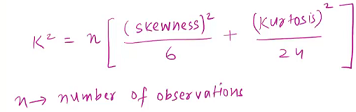

- $K^2$ follows chi-square distribution with degree of freedom 2 (kurtosis and skewness)

- plot $K^2$ and find p-value

6. __Determine the p-value :__ The Omnibus test statistic follows a chi-square distribution with 2 degrees of freedom. Use this distribution to calculate the p-value corresponding to the test statistic.


7. __Compare the p-value to the significance level :__ Compare the p-value
obtained in step 6 to your chosen significance level (e.g., 0.05). 
    - If the p-value is greater than the significance level (p>0.05), you can accept the null
hypothesis that the residuals are normally distributed.<br></br>
    - If the p-value is smaller than the significance level (p<0.05), you reject the null hypothesis,
suggesting that the residuals may not follow a normal distribution.

#### normally distributed data

In [19]:
# Generate a synthetic dataset
np.random.seed(42)
x = np.random.rand(100, 1)
y = 3 * x + np.random.normal(0, 0.3, (100, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred

# Calculate skewness, kurtosis, Omnibus test statistic, and p-value
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
omnibus_stat, omnibus_p_value = stats.normaltest(residuals)

print(f"Skewness: {skewness[0]:.4f}")
print(f"Kurtosis: {kurtosis[0]:.4f}")
print(f"Omnibus test statistic: {omnibus_stat[0]:.4f}")
print(f"Omnibus test p-value: {omnibus_p_value[0]:.4f}")

Skewness: 0.2173
Kurtosis: -0.0712
Omnibus test statistic: 0.9002
Omnibus test p-value: 0.6376


#### non-normal data (sine data)

In [20]:
np.random.seed(42)

# Generate a synthetic dataset with a non-normal distribution
x = np.random.rand(100, 1)
y = np.exp(x) + 10*np.sin(5*np.pi*x) + np.random.normal(0, 0.5, (100, 1))

# Fit a linear regression model
model = LinearRegression()
model.fit(x, y)
y_pred = model.predict(x)

# Calculate the residuals (error terms)
residuals = y - y_pred

# Calculate skewness, kurtosis, Omnibus test statistic, and p-value
skewness = stats.skew(residuals)
kurtosis = stats.kurtosis(residuals)
omnibus_stat, omnibus_p_value = stats.normaltest(residuals)

print(f"Skewness: {skewness[0]:.4f}")
print(f"Kurtosis: {kurtosis[0]:.4f}")
print(f"Omnibus test statistic: {omnibus_stat[0]:.4f}")
print(f"Omnibus test p-value: {omnibus_p_value[0]:.4f}")

Skewness: -0.3717
Kurtosis: -1.2746
Omnibus test statistic: 50.6234
Omnibus test p-value: 0.0000


## 3. Homoscedasticity

## The Assumption

__The spread of the error terms (residuals) should be constant across all levels of the
independent variables.__ If the spread of the residuals changes systematically, it leads to
heteroscedasticity, which can affect the efficiency of the estimates.

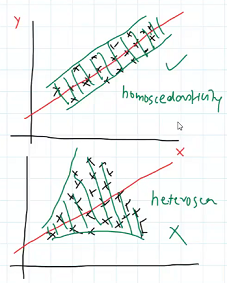


__for heteroscedasticity standard error will not be reliable, hence t-statistics will not be reliable. Confidence Interval will also not br reliable__

### What happens when this assumption is violated?

1. __Inefficient estimates :__ While the parameter estimates (coefficients) are still unbiased, they
are no longer the best linear unbiased estimators (BLUE) under heteroscedasticity. The
inefficiency of the estimates implies that the standard errors are larger than they should
be, which may reduce the statistical power of hypothesis tests.


2. __Inaccurate hypothesis tests :__ The t-tests and F-tests used to assess the significance of the
regression coefficients and the overall model rely on the assumption of homoscedasticity.
If the residuals exhibit heteroscedasticity, these tests may produce misleading results,
leading to incorrect inferences about the significance of the independent variables.


3. __Invalid confidence intervals :__ The confidence intervals for the regression coefficients are
based on the assumption of homoscedastic residuals. If the homoscedasticity assumption
is violated, the confidence intervals may not be accurate, affecting the interpretation of
the effect sizes and the precision of the estimates.

### How to check this assumption

1. __Residual plot :__ Create a scatter plot of the residuals (the differences between the observed
and predicted values) against the predicted values or against each independent variable.
If the plot shows a random scattering of points around zero with no discernible pattern, it
suggests homoscedasticity. If there is a systematic pattern, such as a funnel shape or a
curve, it indicates heteroscedasticity.

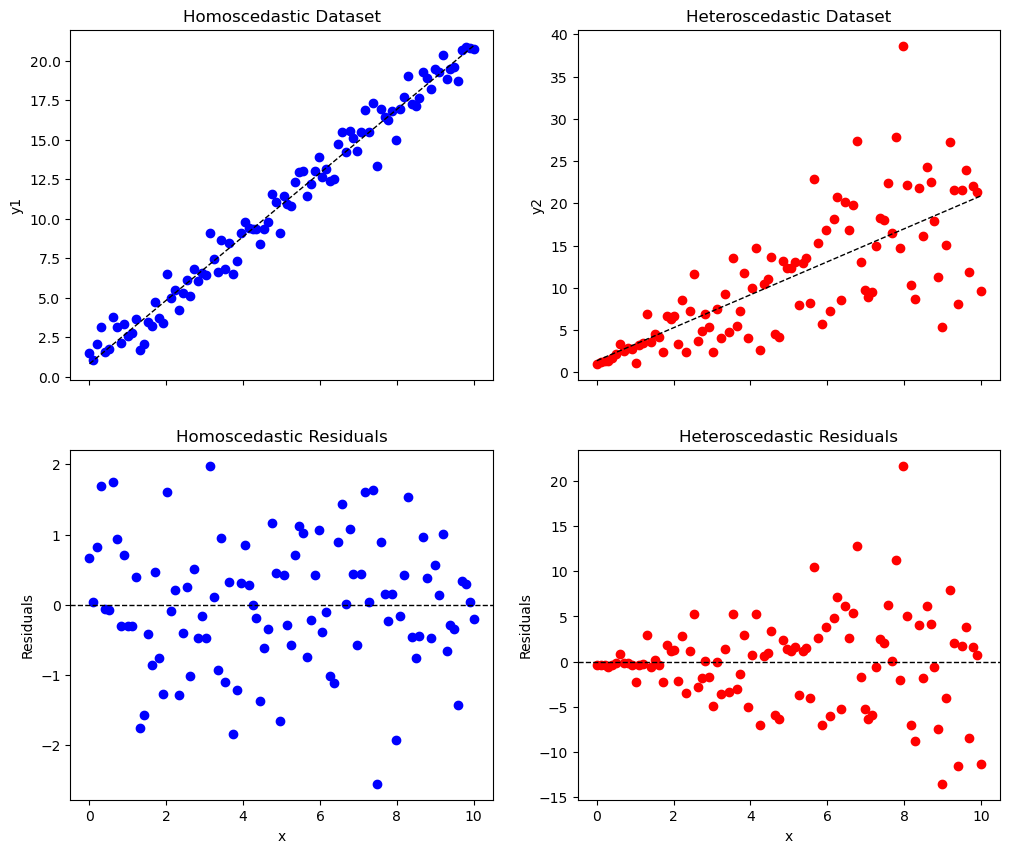

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(42)

# Generate data
x = np.linspace(0, 10, 100)

# Homoscedastic dataset
y1 = 2 * x + 1 + np.random.normal(0, 1, len(x))

# Heteroscedastic dataset
y2 = 2 * x + 1 + np.random.normal(0, x, len(x))

# Fit linear models
coeffs1 = np.polyfit(x, y1, 1)
y1_pred = np.polyval(coeffs1, x)
residuals1 = y1 - y1_pred

coeffs2 = np.polyfit(x, y2, 1)
y2_pred = np.polyval(coeffs2, x)
residuals2 = y2 - y2_pred

# Plot datasets and residuals
fig, axes = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

# Plot dataset 1
axes[0, 0].scatter(x, y1, color='blue')
axes[0, 0].plot(x, y1_pred, color='black', linestyle='--', lw=1)
axes[0, 0].set_title('Homoscedastic Dataset')
axes[0, 0].set_ylabel('y1')

# Plot dataset 2
axes[0, 1].scatter(x, y2, color='red')
axes[0, 1].plot(x, y2_pred, color='black', linestyle='--', lw=1)
axes[0, 1].set_title('Heteroscedastic Dataset')
axes[0, 1].set_ylabel('y2')

# Plot residuals for dataset 1
axes[1, 0].scatter(x, residuals1, color='blue')
axes[1, 0].axhline(0, color='black', linestyle='--', lw=1)
axes[1, 0].set_title('Homoscedastic Residuals')
axes[1, 0].set_xlabel('x')
axes[1, 0].set_ylabel('Residuals')

# Plot residuals for dataset 2
axes[1, 1].scatter(x, residuals2, color='red')
axes[1, 1].axhline(0, color='black', linestyle='--', lw=1)
axes[1, 1].set_title('Heteroscedastic Residuals')
axes[1, 1].set_xlabel('x')
axes[1, 1].set_ylabel('Residuals')

plt.show()


2. __Breusch-Pagan test :__ This is a formal statistical test for heteroscedasticity. The null hypothesis is that the error variances are constant (homoscedastic). If the resulting p-value is less than a chosen significance level (e.g., 0.05), the null hypothesis is rejected, indicating heteroscedasticity.

In [24]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


# Fit linear models
x_with_constant1 = sm.add_constant(x)
model1 = sm.OLS(y1, x_with_constant1).fit()

x_with_constant2 = sm.add_constant(x)
model2 = sm.OLS(y2, x_with_constant2).fit()

# Perform Breusch-Pagan test
bp_test1 = het_breuschpagan(model1.resid, x_with_constant1)
bp_test2 = het_breuschpagan(model2.resid, x_with_constant2)

print("Homoscedastic dataset - Breusch-Pagan test results:")
print(f"LM Statistic: {bp_test1[0]}\nLM-Test p-value: {bp_test1[1]}\nF-Statistic: {bp_test1[2]}\nF-Test p-value: {bp_test1[3]}\n")

print("Heteroscedastic dataset - Breusch-Pagan test results:")
print(f"LM Statistic: {bp_test2[0]}\nLM-Test p-value: {bp_test2[1]}\nF-Statistic: {bp_test2[2]}\nF-Test p-value: {bp_test2[3]}")


Homoscedastic dataset - Breusch-Pagan test results:
LM Statistic: 0.2728976751265044
LM-Test p-value: 0.6013945776291403
F-Statistic: 0.2681715555644599
F-Test p-value: 0.6057280388642075

Heteroscedastic dataset - Breusch-Pagan test results:
LM Statistic: 13.074070036062713
LM-Test p-value: 0.00029941183477116693
F-Statistic: 14.739662423694503
F-Test p-value: 0.00021882735433543236


### What to do when the assumption fails?

1. __Transformations :__ Apply transformations to the dependent and/or independent variables
to stabilize the variance of the residuals. Common transformations include logarithmic,
square root, and inverse transformations.


2. __Weighted Least Squares (WLS) :__ Use a weighted least squares approach, which assigns
different weights to the observations based on the magnitude of their residuals. This
method can help account for heteroscedasticity by giving more importance to
observations with smaller residuals and less importance to those with larger residuals.


3. __Robust standard errors :__ Calculate robust (or heteroscedasticity-consistent) standard
errors for the regression coefficients. These standard errors are more reliable under
heteroscedasticity and can be used to perform more accurate hypothesis tests and
construct valid confidence intervals.

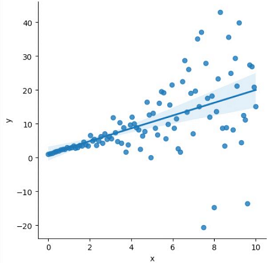

### Standard Error:

- The standard error is a measure of how much your sample average (mean) is likely to differ from the true average of the whole population. It tells you how uncertain or variable your sample estimate is. 


- Smaller standard errors mean your sample estimate is likely very close to the population average, while larger standard errors mean there's more uncertainty in your estimate.


___Standard deviation of the sample means___


$$SE = \frac{\sigma}{\sqrt n}$$

### Breusch-Pagan Test

The Breusch-Pagan test, also known as the Cook-Weisberg test, is a statistical
test used to detect heteroscedasticity in a linear regression model. The test is
based on the assumption that the variance of the errors is a function of one or
more independent variables. Here are the steps to perform the Breusch-Pagan
test:


1. __Estimate the linear regression model :__ Fit a linear regression model to the
data using the ordinary least squares (OLS) method. Obtain the residuals
(errors) from this model.


2. __Calculate the squared residuals :__ Square each residual obtained in step 1.
Regress squared residuals on the independent variables: Perform another
linear regression, this time with the squared residuals as the dependent
variable and the same set of independent variables used in the original
model. Obtain the R-squared value from this regression.


3. __Calculate the test statistic :__ The Breusch-Pagan test statistic, known as the
Lagrange Multiplier (LM) statistic, is calculated as follows:
LM = n * R2
where n is the number of observations and R2 is the R-squared value
obtained in step 3.


4. __Determine the p-value :__ The LM statistic follows a chi-squared distribution
with k degrees of freedom, where k is the number of independent
variables (excluding the constant term). Calculate the p-value for the LM
statistic using the chi-squared distribution.


5. __Make a decision based on the p-value :__ Compare the calculated p-value to
a chosen significance level (usually α = 0.05). If the p-value is less than or
equal to α, reject the null hypothesis and conclude that there is evidence
of heteroscedasticity in the data. If the p-value is greater than α, do not
reject the null hypothesis and assume that the data exhibits
homoscedasticity (constant variance of the residuals).



Note that the Breusch-Pagan test assumes a linear relationship between the
independent variables and the variance of the errors. If the relationship is not
linear, the test may not be appropriate, and other tests for heteroscedasticity
should be considered.

In [1]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_breuschpagan


# Fit linear models
x_with_constant1 = sm.add_constant(x)
model1 = sm.OLS(y1, x_with_constant1).fit()

x_with_constant2 = sm.add_constant(x)
model2 = sm.OLS(y2, x_with_constant2).fit()

# Perform Breusch-Pagan test
bp_test1 = het_breuschpagan(model1.resid, x_with_constant1)
bp_test2 = het_breuschpagan(model2.resid, x_with_constant2)

print("Homoscedastic dataset - Breusch-Pagan test results:")
print(f"LM Statistic: {bp_test1[0]}\nLM-Test p-value: {bp_test1[1]}\nF-Statistic: {bp_test1[2]}\nF-Test p-value: {bp_test1[3]}\n")

print("Heteroscedastic dataset - Breusch-Pagan test results:")
print(f"LM Statistic: {bp_test2[0]}\nLM-Test p-value: {bp_test2[1]}\nF-Statistic: {bp_test2[2]}\nF-Test p-value: {bp_test2[3]}")


NameError: name 'x' is not defined

## 4. Multicollinearity

https://www.youtube.com/watch?v=XGJLWJ0a6aU&t=323s

Multicollinearity is a statistical phenomenon that occurs when two or more independent
variables in a multiple regression model are highly correlated. In other words, these variables
exhibit a strong linear relationship, making it difficult to isolate the individual effects of each
variable on the dependent variable.


##### usually high multi collinearity is 0.9 or 0.8

### When is Multicollinearity bad?

##### NOTE : when we are using data for predictive model then multicollinearity doesnot matters that much. It matters more for inference based models (relationship between input and output).

### 1. Inference:

- Inference focuses on understanding the relationships between the variables in a model.
It aims to draw conclusions about the underlying population or process that generated
the data.


- Inference often involves hypothesis testing, confidence intervals, and determining the
significance of predictor variables.



- The primary goal is to provide insights about the structure of the data and the
relationships between variables.


- Interpretability is a key concern when performing inference, as the objective is to
understand the underlying mechanisms driving the data.


- Examples of inferential techniques include linear regression, logistic regression, and
ANOVA.

### 2. Prediction:

- Prediction focuses on using a model to make accurate forecasts or estimates for new,
unseen data.


- It aims to generalize the model to new instances, based on the patterns observed in the
training data.


- Prediction often involves minimizing an error metric, such as mean squared error or cross-
entropy loss, to assess the accuracy of the model.


- The primary goal is to create an accurate and reliable model for predicting outcomes,
rather than understanding the relationships between variables.


- Interpretability may be less important in predictive modelling, as the main objective is to
create accurate forecasts rather than understanding the underlying structure of the data.



- Examples of predictive techniques include decision trees, support vector machines, neural
networks, and ensemble methods like random forests and gradient boosting machines.

In summary, inference focuses on understanding the relationships between variables and
interpreting the underlying structure of the data, while prediction focuses on creating accurate
forecasts for new, unseen data based on the patterns observed in the training data.

### What exactly happens in Multicollinearity(Mathematically?)

When multicollinearity is present in a model, it can lead to several issues, including:


1. __Difficulty in identifying the most important predictors :__ Due to the high correlation between
independent variables, it becomes challenging to determine which variable has the most
significant impact on the dependent variable.


2. __Inflated standard errors :__ Multicollinearity can lead to larger standard errors for the
regression coefficients, which decreases the statistical power and can make it challenging
to determine the true relationship between the independent and dependent variables. $SE(\beta)$ becomes high values.


3. __Unstable and unreliable estimates :__ The regression coefficients become sensitive to small
changes in the data, making it difficult to interpret the results accurately.

### Perfect Multicollinearity

Perfect multicollinearity occurs when one independent variable in a multiple regression model
is an exact linear combination of one or more other independent variables. In other words,
there is an exact linear relationship between the independent variables, making it impossible
to uniquely estimate the individual effects of each variable on the dependent variable.

##### for multicollinearit : when there is linear correlation between 2 input columns $x_1$ and $x_2$
- when $x_1$ and $x_2$ are not perfectly collinear : $x_1=a_1x_2+a_0+\text{error}$


- when $x_1$ and $x_2$ are perfectly collinear : $x_1=a_1x_2+a_0$

There will be no error when they are perfectly collinear ie. ___perfect multicollinearity___


### Types of Multicollinearity:

1. __Structural multicollinearity :__ Structural multicollinearity arises due to the way in which the
variables are defined or the model is constructed. It occurs when one independent variable
is created as a linear combination of other independent variables or when the model
includes interaction terms or higher-order terms (such as polynomial terms) without proper
scaling or centering.


2. __Data-driven multicollinearity :__ Data-driven multicollinearity occurs when the independent
variables in the dataset are highly correlated due to the specific data being analysed. In this
case, the high correlation between the variables is not a result of the way the variables are
defined or the model is constructed but rather due to the observed data patterns.

### How to detect Multicollinearity:

### 1. correlation

### 2. Variance Inflation factor (VIF)

### 3. Condition number

### 1. Correlation:

Correlation is a measure of the linear relationship between two variables, and it is commonly
used to identify multicollinearity in multiple linear regression models. Multicollinearity occurs
when two or more predictor variables in the model are highly correlated, making it difficult to
determine their individual contributions to the output variable.




To detect multicollinearity using correlation, you can calculate the correlation matrix of the
predictor variables. The correlation matrix is a square matrix that shows the pairwise
correlations between each pair of predictor variables. The diagonal elements of the matrix are
always equal to 1, as they represent the correlation of a variable with itself. The off-diagonal
elements represent the correlation between different pairs of variables.
In the context of multicollinearity, you should look for off-diagonal elements with high
absolute values (e.g., greater than 0.8 or 0.9, depending on the specific application and the
level of concern about multicollinearity). High correlation values indicate that the
corresponding predictor variables are highly correlated and may be causing multicollinearity
issues in the regression model.






It's important to note that while correlation can be a useful tool for detecting multicollinearity,
it doesn't provide a complete picture of the severity of the issue or its impact on the
regression model. Other diagnostic measures, such as Variance Inflation Factor (VIF) and
condition number, can also be used to assess the presence and severity of multicollinearity in
a regression model.

In [1]:
import pandas as pd
import seaborn as sns

df = pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv')

df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


<AxesSubplot:>

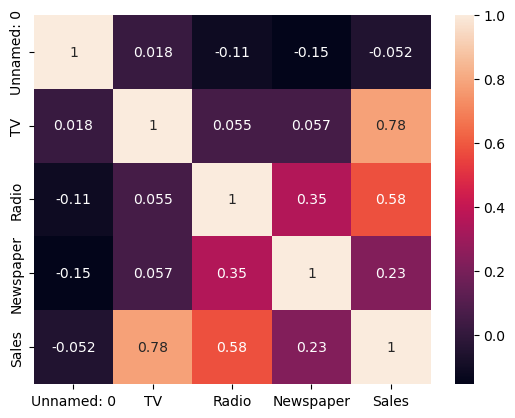

In [2]:
sns.heatmap(df.corr(),annot=True)

### 2. Variance Inflation Factor

- Variance Inflation Factor (VIF) is a metric used to quantify the severity of multicollinearity in a
multiple linear regression model. 


- It measures the extent to which the variance of an estimated
regression coefficient is increased due to multicollinearity.



- For each predictor variable in the regression model, VIF is calculated by performing a separate
linear regression using that predictor as the response variable and the remaining predictor
variables as the independent variables. 


- The VIF for the predictor variable is then calculated as
the reciprocal of the variance explained by the other predictors, which is equal to 

$$\text{VIF formula}=\frac {1}{(1 - R^2 \text{score})}$$



- Here, R2 is the coefficient of determination for the linear regression using the predictor
variable as the response variable.

##### The VIF calculation can be summarized in the following steps:


1. For each predictor variable Xi in the regression model, perform a linear regression using Xi
as the response variable and the remaining predictor variables as the independent
variables.


2. Calculate the R2 value for each of these linear regressions.



3. Compute the VIF for each predictor variable Xi as VIFi = 1 / (1 - R2i).

A VIF value close to 1 indicates that there is very little multicollinearity for the predictor
variable, whereas a high VIF value (e.g., greater than 5 or 10, depending on the context)
suggests that multicollinearity may be a problem for the predictor variable, and its estimated
coefficient might be less reliable.




Keep in mind that VIF only provides an indication of the presence and severity of
multicollinearity and does not directly address the issue. Depending on the VIF values and the
goals of the analysis, you might consider using techniques like variable selection,
regularization, or dimensionality reduction methods to address multicollinearity.

In [3]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = []

for i in range(3):
    vif.append(variance_inflation_factor(df.iloc[:,1:4], i))

In [4]:
pd.DataFrame({'vif': vif}, index=df.columns[1:4]).T

,TV,Radio,Newspaper
vif,2.486772,3.285462,3.055245


### 3. Condition Number


In the context of multicollinearity, the condition number is a diagnostic measure used to
assess the stability and potential numerical issues in a multiple linear regression model. It
provides an indication of the severity of multicollinearity by examining the sensitivity of the
linear regression to small changes in the input data.




- __The condition number is calculated as the ratio of the largest eigenvalue to the smallest
eigenvalue of the matrix XTX, where X is the design matrix of the regression model (each row
representing an observation and each column representing a predictor variable).__ 



- A high
condition number suggests that the matrix XTX is __ill-conditioned (difficulty in calculating inverse and when determinant = 0)and can lead to numerical
instability__ when solving the normal equations for the regression coefficients.
In the presence of multicollinearity, the design matrix X has highly correlated columns, which
can cause the eigenvalues of XTX to be very different in magnitude (one or more very large
eigenvalues and one or more very small eigenvalues). As a result, the condition number
becomes large, indicating that the regression model may be sensitive to small changes in the
input data, leading to unstable coefficient estimates.



- Typically, a __condition number larger than 30 (or sometimes even larger than 10 or 20) is
considered a warning sign of potential multicollinearity issues.__ However, the threshold for the
condition number depends on the specific application and the level of concern about
multicollinearity.




It's important to note that a high condition number alone is not definitive proof of
multicollinearity. It is an indication that multicollinearity might be a problem, and further
investigation (e.g., using VIF, correlation matrix, or tolerance values) may be required to
confirm the presence and severity of multicollinearity.

In [8]:
import numpy as np

In [10]:
A = np.array([[1, 2],
              [3, 4]])

condition_number = np.linalg.cond(A)
print("Condition Number:", condition_number)

Condition Number: 14.933034373659265


## How to remove multicollinearity

### 1. __Collect more data :__ In some cases, multicollinearity might be a result of a limited sample
size. Collecting more data, if possible, can help reduce multicollinearity and improve the
stability of the model.


2. __Remove one of the highly correlated variables :__ If two or more independent variables are
highly correlated, consider removing one of them from the model. This step can help
eliminate redundancy in the model and reduce multicollinearity. Choose the variable to
remove based on domain knowledge, variable importance, or the one with the highest VIF.


3. __Combine correlated variables :__ If correlated independent variables represent similar
information, consider combining them into a single variable. This combination can be done
by averaging, summing, or using other mathematical operations, depending on the context
and the nature of the variables.


4. __Use partial least squares regression (PLS) :__ PLS is a technique that combines features of both
principal component analysis and multiple regression. It identifies linear combinations of
the predictor variables (called latent variables) that have the highest covariance with the
response variable, reducing multicollinearity while retaining most of the predictive power.

### 2. Remove one of the highly correlated variables :

In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression

# Generate a synthetic dataset with multicollinearity
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100)  # Introduce multicollinearity between columns 0 and 1

# Convert data to a pandas DataFrame
data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y


data

,X1,X2,X3,y
0,-0.792521,-0.544164,-0.114736,13.480582
1,0.280992,0.211860,-0.622700,-18.902685
2,0.791032,1.114876,-0.909387,110.450979
3,0.625667,1.387182,-0.857158,-78.162124
4,-0.342715,-0.459791,-0.802277,-35.728094
...,...,...,...,...
95,0.651391,-0.080366,-0.315269,68.841646
96,1.586017,1.734077,-1.237815,183.634164
97,0.010233,0.140761,-0.981509,17.531189
98,-0.234587,-0.232030,-1.415371,-63.202789


In [15]:
data.corr()

,X1,X2,X3,y
X1,1.000000,0.882948,-0.048636,0.148108
X2,0.882948,1.000000,-0.054696,0.165352
X3,-0.048636,-0.054696,1.000000,0.071536
y,0.148108,0.165352,0.071536,1.000000


#### keeping x1, x2, x3 : 

In [20]:
# Add a constant term to the predictor variables
data_with_constant_all = sm.add_constant(data[['X1', 'X2', 'X3']])
data_with_constant_all

,const,X1,X2,X3
0,1.0,-0.792521,-0.544164,-0.114736
1,1.0,0.280992,0.211860,-0.622700
2,1.0,0.791032,1.114876,-0.909387
3,1.0,0.625667,1.387182,-0.857158
4,1.0,-0.342715,-0.459791,-0.802277
...,...,...,...,...
95,1.0,0.651391,-0.080366,-0.315269
96,1.0,1.586017,1.734077,-1.237815
97,1.0,0.010233,0.140761,-0.981509
98,1.0,-0.234587,-0.232030,-1.415371


In [21]:
# Create and fit an OLS model using all three predictor variables
model_all = sm.OLS(data['y'], data_with_constant_all).fit()

# Print the summary for the model with all predictors
print("Regression summary for the model with all predictors:")
print(model_all.summary())

Regression summary for the model with all predictors:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.122
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.344
Time:                        01:21:07   Log-Likelihood:                -581.96
No. Observations:                 100   AIC:                             1172.
Df Residuals:                      96   BIC:                             1182.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

#### keeping only x1 and x3 : 

In [22]:
data_with_constant_reduced = sm.add_constant(data[['X1', 'X3']])
data_with_constant_reduced

,const,X1,X3
0,1.0,-0.792521,-0.114736
1,1.0,0.280992,-0.622700
2,1.0,0.791032,-0.909387
3,1.0,0.625667,-0.857158
4,1.0,-0.342715,-0.802277
...,...,...,...
95,1.0,0.651391,-0.315269
96,1.0,1.586017,-1.237815
97,1.0,0.010233,-0.981509
98,1.0,-0.234587,-1.415371


In [23]:
# Create and fit an OLS model using only X1 and X3 (removing the highly correlated variable X2)
model_reduced = sm.OLS(data['y'], data_with_constant_reduced).fit()

# Print the summary for the model with reduced predictors (X1 and X3)
print("\nRegression summary for the model with reduced predictors (X1 and X3):")
print(model_reduced.summary())


Regression summary for the model with reduced predictors (X1 and X3):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.405
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.250
Time:                        01:21:27   Log-Likelihood:                -582.25
No. Observations:                 100   AIC:                             1171.
Df Residuals:                      97   BIC:                             1178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------

#### there is change in std error. it is reduced.

#### cond no decreaeed from 4.13 to 1.35 after removing multicollinearity

### 3. Combine correlated variables :

In [25]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.datasets import make_regression

# Generate a synthetic dataset with multicollinearity
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100)  # Introduce multicollinearity between columns 0 and 1

# Convert data to a pandas DataFrame
data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y
data

,X1,X2,X3,y
0,-0.792521,-0.544164,-0.114736,13.480582
1,0.280992,0.211860,-0.622700,-18.902685
2,0.791032,1.114876,-0.909387,110.450979
3,0.625667,1.387182,-0.857158,-78.162124
4,-0.342715,-0.459791,-0.802277,-35.728094
...,...,...,...,...
95,0.651391,-0.080366,-0.315269,68.841646
96,1.586017,1.734077,-1.237815,183.634164
97,0.010233,0.140761,-0.981509,17.531189
98,-0.234587,-0.232030,-1.415371,-63.202789


In [26]:
# Calculate correlation matrix
corr_matrix = data.corr()
print("Correlation matrix:\n", corr_matrix)

Correlation matrix:
           X1        X2        X3         y
X1  1.000000  0.882948 -0.048636  0.148108
X2  0.882948  1.000000 -0.054696  0.165352
X3 -0.048636 -0.054696  1.000000  0.071536
y   0.148108  0.165352  0.071536  1.000000


#### combining the columns : 

In [27]:
# Combine the correlated variables X1 and X2 by taking their average
data['X1_X2_combined'] = (data['X1'] + data['X2']) / 2
data

,X1,X2,X3,y,X1_X2_combined
0,-0.792521,-0.544164,-0.114736,13.480582,-0.668342
1,0.280992,0.211860,-0.622700,-18.902685,0.246426
2,0.791032,1.114876,-0.909387,110.450979,0.952954
3,0.625667,1.387182,-0.857158,-78.162124,1.006425
4,-0.342715,-0.459791,-0.802277,-35.728094,-0.401253
...,...,...,...,...,...
95,0.651391,-0.080366,-0.315269,68.841646,0.285513
96,1.586017,1.734077,-1.237815,183.634164,1.660047
97,0.010233,0.140761,-0.981509,17.531189,0.075497
98,-0.234587,-0.232030,-1.415371,-63.202789,-0.233309


In [28]:
# Add a constant term to the predictor variables
data_with_constant_all = sm.add_constant(data[['X1', 'X2', 'X3']])

In [30]:
# Create and fit an OLS model using all three predictor variables
model_all = sm.OLS(data['y'], data_with_constant_all).fit()


# Print the summary for the model with all predictors
print("Regression summary for the model with all predictors:")
print(model_all.summary())

Regression summary for the model with all predictors:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.034
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     1.122
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.344
Time:                        01:26:50   Log-Likelihood:                -581.96
No. Observations:                 100   AIC:                             1172.
Df Residuals:                      96   BIC:                             1182.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

#### OLS for columns combined : 

In [31]:
data_with_constant_combined = sm.add_constant(data[['X1_X2_combined', 'X3']])

# Create and fit an OLS model using the combined variable and X3
model_combined = sm.OLS(data['y'], data_with_constant_combined).fit()

# Print the summary for the model with combined predictors (X1_X2_combined and X3)
print("\nRegression summary for the model with combined predictors (X1_X2_combined and X3):")
print(model_combined.summary())


Regression summary for the model with combined predictors (X1_X2_combined and X3):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.033
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     1.643
Date:                Wed, 04 Oct 2023   Prob (F-statistic):              0.199
Time:                        01:27:09   Log-Likelihood:                -582.02
No. Observations:                 100   AIC:                             1170.
Df Residuals:                      97   BIC:                             1178.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

### 4. Use partial least squares regression (PLS)

### Partial Least Regression

In [24]:
import numpy as np
import pandas as pd
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.cross_decomposition import PLSRegression

# Generate a synthetic dataset with multicollinearity
np.random.seed(42)
X, y = make_regression(n_samples=100, n_features=3, noise=0.5, random_state=42)
X[:, 1] = X[:, 0] + 0.5 * np.random.normal(size=100)  # Introduce multicollinearity between columns 0 and 1

# Convert data to a pandas DataFrame
data = pd.DataFrame(X, columns=['X1', 'X2', 'X3'])
data['y'] = y

data

,X1,X2,X3,y
0,-0.792521,-0.544164,-0.114736,13.480582
1,0.280992,0.211860,-0.622700,-18.902685
2,0.791032,1.114876,-0.909387,110.450979
3,0.625667,1.387182,-0.857158,-78.162124
4,-0.342715,-0.459791,-0.802277,-35.728094
...,...,...,...,...
95,0.651391,-0.080366,-0.315269,68.841646
96,1.586017,1.734077,-1.237815,183.634164
97,0.010233,0.140761,-0.981509,17.531189
98,-0.234587,-0.232030,-1.415371,-63.202789


In [32]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data[['X1', 'X2', 'X3']], data['y'], test_size=0.2, random_state=42)

# Create a PLS model with 2 components
pls_model = PLSRegression(n_components=2)

# Fit the PLS model using the training data
pls_model.fit(X_train, y_train)

# Predict the output using the test data
y_pred = pls_model.predict(X_test)

# Calculate the mean squared error of the predictions
mse = mean_squared_error(y_test, y_pred)
print("Mean squared error of PLS model:", mse)

Mean squared error of PLS model: 7359.987203343638


---
---

## 5. Autocorrealtion

### The Assumption
There should be no apparent correlation or pattern in the residuals, as this
would suggest that the error terms are not independent.


### What happens when this assumption is violated?
1. __Inefficient estimates :__ The parameter estimates (coefficients) remain
unbiased, but they are no longer the best linear unbiased estimators
(BLUE). The inefficiency of the estimates implies that the standard errors
may be larger than they should be, which may reduce the statistical
power of hypothesis tests.


2. __Inaccurate hypothesis tests :__ The t-tests and F-tests used to assess the
significance of the regression coefficients and the overall model rely on
the assumption of no autocorrelation. If the error terms exhibit
autocorrelation, these tests may produce misleading results, leading to
incorrect inferences about the significance of the independent variables.


3. __Invalid confidence intervals :__ The confidence intervals for the regression
coefficients are based on the assumption of no autocorrelation. If this
assumption is violated, the confidence intervals may not be accurate,
affecting the interpretation of the effect sizes and the precision of the
estimates.

### How to check this assumption

### Durbin-Watson test :



This is a formal statistical test for autocorrelation,
specifically first-order autocorrelation. The Durbin-Watson test statistic
ranges from 0 to 4, with a value of 2 indicating no autocorrelation. Values
less than 2 suggest positive autocorrelation, while values greater than 2 indicate negative autocorrelation. It is important to note that the Durbin-

    Watson test is only applicable for first-order autocorrelation and may not detect higher-order autocorrelation.

### What to do when the assumption fails?

1. __Lagged variables :__ Include lagged values of the dependent variable or the independent variables as predictors in the model to account for the autocorrelation.


2. __Differencing :__ Apply differencing to the dependent and/or independent
variables, which can help remove the autocorrelation by focusing on the
changes between consecutive observations rather than the absolute
values.


3. __Generalized least squares (GLS) :__ Use a generalized least squares approach
that accounts for the autocorrelation structure in the error terms, leading
to more efficient and reliable estimates. 


4. __Time series models :__ Consider using specialized time series models, such as
autoregressive (AR), moving average (MA), autoregressive integrated
moving average (ARIMA), or seasonal decomposition of time series (STL),
which are designed to handle autocorrelation.


5. __Robust standard errors :__ Calculate robust standard errors that are more
reliable under autocorrelation, such as Newey-West standard errors or
HAC (heteroscedasticity and autocorrelation consistent) standard errors.